<a href="https://colab.research.google.com/github/deepakri201/NLSTNatureSciData/blob/main/UsageNotes/NLSTSybilFMDemo/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLST_Sybil_FM_demo_part2

This notebook requires the nlst_sybil_fm.csv, which can be downloaded from github release attachments.

In this notebook, we save out the features from FMCIB and create:
- fmcib_input.csv file - holds the filepaths, center coordinates and labels for classification
- fmcib_features.csv file - the features extracted using the FMCIB

Deepa Krishnaswamy

Brigham and Women's Hospital

July 2025

Notes:
- T4 GPU with high RAM

# Environment setup FMCIB

In [ ]:
# !pip install foundation-cancer-image-biomarker
!pip install foundation-cancer-image-biomarker --pre

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of foundation-cancer-image-biomarker to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 62.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pynetdicom to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with o

# Parameterization

In [ ]:
#@title Enter your Project ID here
# initialize this variable with your Google Cloud Project ID!
project_name = "idc-external-018" #@param {type:"string"}

import os
os.environ["GCP_PROJECT_ID"] = project_name

!gcloud config set project $project_name

from google.colab import auth
auth.authenticate_user()

Updated property [core/project].


# Environment setup

In [ ]:
from fmcib.run import get_features
from fmcib.visualization import visualize_seed_point
import SimpleITK as sitk


Please cite:
Thomas Phil, Thomas Albrecht, Skylar Gay, & Mathis Ersted Rasmussen. (2023). Sikerdebaard/dcmrtstruct2nii: dcmrtstruct2nii v5 (Version v5). Zenodo. https://doi.org/10.5281/zenodo.4037864



/usr/local/lib/python3.12/dist-packages/monai/transforms/io/array.py:205: UserWarning: required package for reader ITKReader is not installed, or the version doesn't match requirement.
  warnings.warn(


In [ ]:
import os
import sys
import pandas as pd
import numpy as np

In [ ]:
!wget https://github.com/rordenlab/dcm2niix/releases/latest/download/dcm2niix_lnx.zip
!unzip dcm2niix_lnx.zip
!cp /content/dcm2niix /usr/local/bin

--2025-08-29 16:45:15--  https://github.com/rordenlab/dcm2niix/releases/latest/download/dcm2niix_lnx.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rordenlab/dcm2niix/releases/download/v1.0.20250506/dcm2niix_lnx.zip [following]
--2025-08-29 16:45:15--  https://github.com/rordenlab/dcm2niix/releases/download/v1.0.20250506/dcm2niix_lnx.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/25434012/ad8c76fa-0b5f-4856-aca4-987ab3de6bf3?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-29T17%3A37%3A59Z&rscd=attachment%3B+filename%3Ddcm2niix_lnx.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-29T16%3A37%3A20Z&ske=2025-08-29T17%

In [ ]:
!pip install idc-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 98.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 112.1 MB/s eta 0:00:00
  Attempting uninstall: duckdb
    Found existing installation: duckdb 1.3.2
    Uninstalling duckdb-1.3.2:
      Successfully uninstalled duckdb-1.3.2


In [ ]:
from idc_index import IDCClient

idc_client = IDCClient.client()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the nlst_sybil_fm.csv file

In [ ]:
!wget https://github.com/deepakri201/SR_for_NLST_Sybil/releases/download/v1.0.1/nlst_sybil_fm.csv

--2025-08-29 16:45:33--  https://github.com/deepakri201/SR_for_NLST_Sybil/releases/download/v1.0.1/nlst_sybil_fm.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/983681157/2f516406-d8ef-45af-bd3c-d1c1379018c8?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-29T17%3A37%3A07Z&rscd=attachment%3B+filename%3Dnlst_sybil_fm.csv&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-29T16%3A36%3A53Z&ske=2025-08-29T17%3A37%3A07Z&sks=b&skv=2018-11-09&sig=xdRgZ%2FqeR9Pusoijwzb8cjocM3NQ9ngpFNE6Cub9oTo%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NjQ4NjIzMywibmJmIjoxNzU2NDg1OTMzLCJwYXRoIjoicmVsZWFzZWFzc2V0cH

In [ ]:
# Load the nlst_sybil_fm.csv

nlst_sybil_fm_filename = "/content/nlst_sybil_fm.csv"
df_sr_and_nlst = pd.read_csv(nlst_sybil_fm_filename)

In [ ]:
# Specify classes to use for the classification

# Keep two stages for classification

print(len(list(set(df_sr_and_nlst[df_sr_and_nlst['de_stag_mapped']==0]['PatientID'].values))))
print(len(list(set(df_sr_and_nlst[df_sr_and_nlst['de_stag_mapped']==1]['PatientID'].values))))

df_sr_and_nlst_subset = df_sr_and_nlst[df_sr_and_nlst['de_stag_mapped'].isin([0,1])]

263
61


In [ ]:
df_sr_and_nlst_subset.columns

Index(['Unnamed: 0', 'PatientID', 'StudyInstanceUID', 'StudyDate', 'study_yr',
       'SeriesInstanceUID', 'ReferencedSeriesInstanceUID',
       'sop_count_per_series', 'TrackingIdentifier', 'TrackingUID',
       'ReferencedSOPInstanceUID', 'FindingType', 'FindingSite',
       'pixel_spacing_x', 'pixel_spacing_y', 'width', 'height', 'center_x',
       'center_y', 'ipp0', 'ipp1', 'ipp2', 'sct_slice_num', 'de_stag_mapped'],
      dtype='object')

In [ ]:
SeriesInstanceUIDs_temp = sorted(list(set(df_sr_and_nlst_subset['ReferencedSeriesInstanceUID'].values)))
df_sr_and_nlst_subset = df_sr_and_nlst_subset[df_sr_and_nlst_subset['ReferencedSeriesInstanceUID'].isin(SeriesInstanceUIDs_temp)]

# We need to remove the places where the SOPInstanceUID appears twice - means >1 lesion on a slice - just to keep it simple for now.
df_sr_and_nlst_subset = df_sr_and_nlst_subset[df_sr_and_nlst_subset['ReferencedSOPInstanceUID'].duplicated(keep=False) == False]
print('num_sop: ' + str(len(df_sr_and_nlst_subset)))

num_series = len(SeriesInstanceUIDs_temp)
print('num_series: ' + str(num_series))

# It's fine that the num_sop>num_series. Some series have multiple SOPInstanceUIDs, so there are lesions on multiple slices.

num_sop: 525
num_series: 465


# Download DICOM data

In [ ]:
# First download DICOM data using idc-index

dicom_directory = "/content/dicom"
if not os.path.isdir(dicom_directory):
  os.mkdir(dicom_directory)

# Download the series
idc_client.download_from_selection(
          seriesInstanceUID=list(SeriesInstanceUIDs_temp),
          downloadDir=dicom_directory,
          dirTemplate='%SeriesInstanceUID'
)

# Convert DICOM to nifti

In [ ]:
import time

start_time = time.time()

# Convert DICOM to nii using SimpleITK - sitkImagesSeriesReader
# This is the code he uses
# https://github.com/Sikerdebaard/dcmrtstruct2nii/blob/master/dcmrtstruct2nii/adapters/input/image/dcminputadapter.py
# Just one series for now

# Create nifti directory
nifti_directory = "/content/nifti"
if not os.path.isdir(nifti_directory):
  os.mkdir(nifti_directory)

num_series = len(SeriesInstanceUIDs_temp)
print('num_series: ' + str(num_series))

checkpoints = {int(num_series * i / 10) for i in range(1, 11)}

for n,SeriesInstanceUID in enumerate(SeriesInstanceUIDs_temp,1):

  download_path = os.path.join(dicom_directory, SeriesInstanceUID)

  # Create DICOM image using sitk
  dicom_reader = sitk.ImageSeriesReader()
  if SeriesInstanceUID is None:
    SeriesInstanceUID = ''
  dicom_file_names = dicom_reader.GetGDCMSeriesFileNames(str(download_path), seriesID=SeriesInstanceUID)
  if not dicom_file_names:
    print('Directory {} is not a dicom'.format(download_path))
  dicom_reader.SetFileNames(dicom_file_names)
  dicom_image = dicom_reader.Execute()

  # Write image as nii using sitk
  output_nifti_filename = os.path.join(nifti_directory, str(SeriesInstanceUID) + '.nii.gz')
  sitk.WriteImage(dicom_image, output_nifti_filename)
  output_nifti_filename_bucket = os.path.join("gs://nlst_sybil_fm_demo/nifti", str(SeriesInstanceUID) + ".nii.gz")

  # copy to bucket for now
  !gsutil cp $output_nifti_filename $output_nifti_filename_bucket

  if n in checkpoints:
    print(f"{(n / num_series) * 100:.0f}% of series processed.")

end_time = time.time()
print('Elapsed time in minutes: ' + str((end_time-start_time)/60))

num_series: 465
Copying file:///content/nifti/1.2.840.113654.2.55.100267029693057843237393396736558778216.nii.gz [Content-Type=application/octet-stream]...
- [1 files][ 45.3 MiB/ 45.3 MiB]                                                
Operation completed over 1 objects/45.3 MiB.                                     
Copying file:///content/nifti/1.2.840.113654.2.55.100351100373053521369852762027803712061.nii.gz [Content-Type=application/octet-stream]...
\
Operation completed over 1 objects/56.8 MiB.                                     
Copying file:///content/nifti/1.2.840.113654.2.55.10212803674068251180698456742623207615.nii.gz [Content-Type=application/octet-stream]...
\
Operation completed over 1 objects/49.3 MiB.                                     
Copying file:///content/nifti/1.2.840.113654.2.55.102679371468953163285569140890061441420.nii.gz [Content-Type=application/octet-stream]...
- [1 files][ 49.2 MiB/ 49.2 MiB]                                                
Operation com

# Form the csv file that holds the nii file path and seed points

In [ ]:
df_sr_and_nlst_subset.columns

Index(['Unnamed: 0', 'PatientID', 'StudyInstanceUID', 'StudyDate', 'study_yr',
       'SeriesInstanceUID', 'ReferencedSeriesInstanceUID',
       'sop_count_per_series', 'TrackingIdentifier', 'TrackingUID',
       'ReferencedSOPInstanceUID', 'FindingType', 'FindingSite',
       'pixel_spacing_x', 'pixel_spacing_y', 'width', 'height', 'center_x',
       'center_y', 'ipp0', 'ipp1', 'ipp2', 'sct_slice_num', 'de_stag_mapped'],
      dtype='object')

In [ ]:
import time

start_time = time.time()

# Convert to global coordinates
def convert_local_to_global(image_path, x, y, z):
  itk_image = sitk.ReadImage(image_path)
  x_global, y_global, z_global = itk_image.TransformContinuousIndexToPhysicalPoint((x, y, z))
  return [x_global, y_global, z_global]

# Create a csv with the following:
# image_path	PatientID	coordX	coordY	coordZ	label
df_for_csv = pd.DataFrame()
SOPInstanceUID_for_csv = list(df_sr_and_nlst_subset['ReferencedSOPInstanceUID'].values)
df_for_csv['PatientID'] = df_sr_and_nlst_subset['PatientID'].values
df_for_csv['SeriesInstanceUID'] = df_sr_and_nlst_subset['ReferencedSeriesInstanceUID'].values
df_for_csv['SOPInstanceUID'] = df_sr_and_nlst_subset['ReferencedSOPInstanceUID'].values
df_for_csv['image_path'] = [os.path.join('/content/nifti',f+'.nii.gz') for f in df_for_csv['SeriesInstanceUID'].values]
# df_for_csv = df_for_csv.head(1)

# Now iterate over each series to get the appropriate dim
# Technically, each should have 512x512, but maybe not.

coordX = []
coordY = []
coordZ = []
label = []

checkpoints = {int(len(SOPInstanceUID_for_csv) * i / 10) for i in range(1, 11)}

for n,SOPInstanceUID in enumerate(SOPInstanceUID_for_csv,1):

  # # Get the dim from the appropriate nifti file - takes too long to load.
  # output_nifti_filename = df_for_csv[df_for_csv['SOPInstanceUID']==SOPInstanceUID]['image_path'].values[0]
  # nii = nib.load(output_nifti_filename)
  # dim = nii.header['dim'][1:4]

  # Get the dim from the dataframe
  temp_df = df_sr_and_nlst_subset[df_sr_and_nlst_subset['ReferencedSOPInstanceUID']==SOPInstanceUID]
  # dim = [temp_df['Rows'].values[0], temp_df['Columns'].values[0], temp_df['sop_count_per_series'].values[0]]

  # Get the series
  SeriesInstanceUID = df_for_csv[df_for_csv['SOPInstanceUID']==SOPInstanceUID]['SeriesInstanceUID'].values[0]

  # coordX_value = dim[0] * (temp_df['x'].values[0] + temp_df['width'].values[0]/2)
  # coordY_value = dim[1] * (temp_df['y'].values[0] + temp_df['height'].values[0]/2)

  # coordX_value = (temp_df['center_x'].values[0] - temp_df['ipp0'].values[0]) / temp_df['pixel_spacing_x'].values[0] # we start with center_x in mm, so convert to voxel space
  # coordY_value = (temp_df['center_y'].values[0] - temp_df['ipp1'].values[0]) / temp_df['pixel_spacing_y'].values[0] # we start with center_y in mm, so convert to voxel space
  # already in pixel space
  coordX_value = temp_df['center_x'].values[0]
  coordY_value = temp_df['center_y'].values[0]
  # coordZ_value = dim[2] - np.float32(temp_df['sct_slice_num'].values[0])
  coordZ_value = temp_df['sop_count_per_series'].values[0] - np.float32(temp_df['sct_slice_num'].values[0])
  label_value = (df_sr_and_nlst_subset[df_sr_and_nlst_subset['ReferencedSOPInstanceUID']==SOPInstanceUID]['de_stag_mapped'].values[0])
  coordX.append(coordX_value)
  coordY.append(coordY_value)
  coordZ.append(coordZ_value)
  label.append(label_value)

  if n in checkpoints:
    print(f"{(n / len(SOPInstanceUID_for_csv)) * 100:.0f}% of sop processed.")

# Assign to df
df_for_csv['coordX'] = coordX
df_for_csv['coordY'] = coordY
df_for_csv['coordZ'] = coordZ
df_for_csv['label'] = label
print('orig len of df_for_csv: ' + str(len(df_for_csv)))

# remove the None rows
df_for_csv = df_for_csv.dropna()
print('new len of df_for_csv: ' + str(len(df_for_csv)))

# convert
df_for_csv['coordX'] = [np.asarray(f, dtype='float64') for f in df_for_csv['coordX']]
df_for_csv['coordY'] = [np.asarray(f, dtype='float64') for f in df_for_csv['coordY']]
df_for_csv['coordZ'] = [np.asarray(f, dtype='float64') for f in df_for_csv['coordZ']]
# floor
df_for_csv['coordX'] = [np.floor(f) for f in df_for_csv['coordX']]
df_for_csv['coordY'] = [np.floor(f) for f in df_for_csv['coordY']]
df_for_csv['coordZ'] = [np.floor(f) for f in df_for_csv['coordZ']]

df_for_csv2 = df_for_csv.copy(deep=True)

temp_coord = [convert_local_to_global(f,x,y,z) for f,x,y,z in zip(df_for_csv['image_path'].values,
                                                                  df_for_csv['coordX'].values,
                                                                  df_for_csv['coordY'].values,
                                                                  df_for_csv['coordZ'].values)]

# Now negate coordX and coordY
# df_for_csv2['coordX'] = [-f for f in df_for_csv2['coordX'].values]
# df_for_csv2['coordY'] = [-f for f in df_for_csv2['coordY'].values]

# df_for_csv2
df_for_csv2['coordX'] = [f[0] for f in temp_coord]
df_for_csv2['coordY'] = [f[1] for f in temp_coord]
df_for_csv2['coordZ'] = [f[2] for f in temp_coord]

df_for_csv2.head()

end_time = time.time()
print('Elapsed time in minutes: ' + str((end_time-start_time)/60))

10% of sop processed.
20% of sop processed.
30% of sop processed.
40% of sop processed.
50% of sop processed.
60% of sop processed.
70% of sop processed.
80% of sop processed.
90% of sop processed.
100% of sop processed.
orig len of df_for_csv: 525
new len of df_for_csv: 525
Elapsed time in minutes: 4.832373734315237


In [ ]:
df_for_csv.head()

,PatientID,SeriesInstanceUID,SOPInstanceUID,image_path,coordX,coordY,coordZ,label
0,100012,1.2.840.113654.2.55.24023112856488152536348979...,1.2.840.113654.2.55.23447016361362557671014824...,/content/nifti/1.2.840.113654.2.55.24023112856...,199.0,310.0,124.0,0
1,100012,1.2.840.113654.2.55.50761756412482430061802871...,1.2.840.113654.2.55.23050894131215950278743827...,/content/nifti/1.2.840.113654.2.55.50761756412...,166.0,328.0,118.0,0
2,100147,1.2.840.113654.2.55.24785488463405747713776937...,1.2.840.113654.2.55.17981552983033538571417359...,/content/nifti/1.2.840.113654.2.55.24785488463...,150.0,313.0,22.0,0
3,100147,1.2.840.113654.2.55.15708941008648745210499888...,1.2.840.113654.2.55.19851369674160913596156868...,/content/nifti/1.2.840.113654.2.55.15708941008...,147.0,332.0,24.0,0
4,100158,1.2.840.113654.2.55.31060976780967844152296392...,1.2.840.113654.2.55.18324898484332559595555356...,/content/nifti/1.2.840.113654.2.55.31060976780...,103.0,272.0,89.0,0


# Confirm and visualize seed points

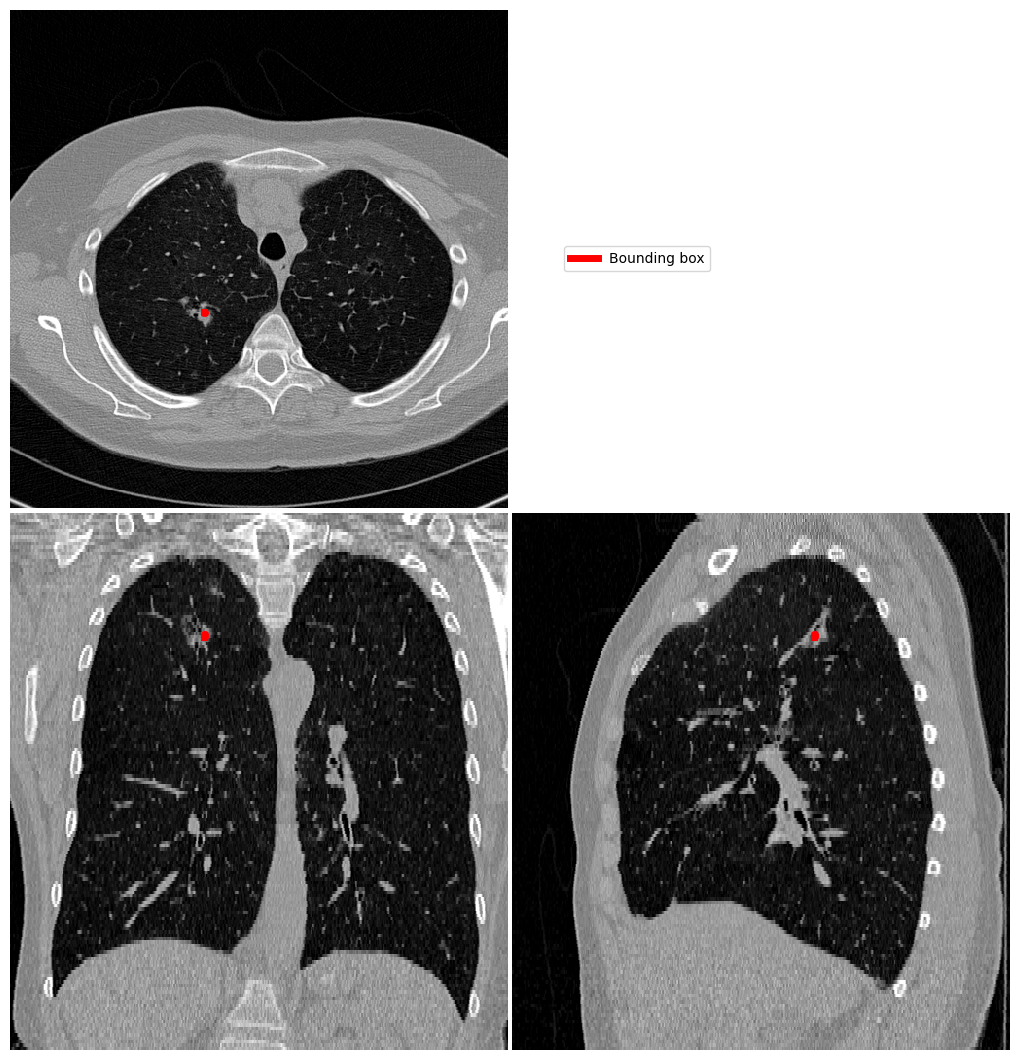

In [ ]:
row = dict(df_for_csv2.iloc[0])
visualize_seed_point(row)

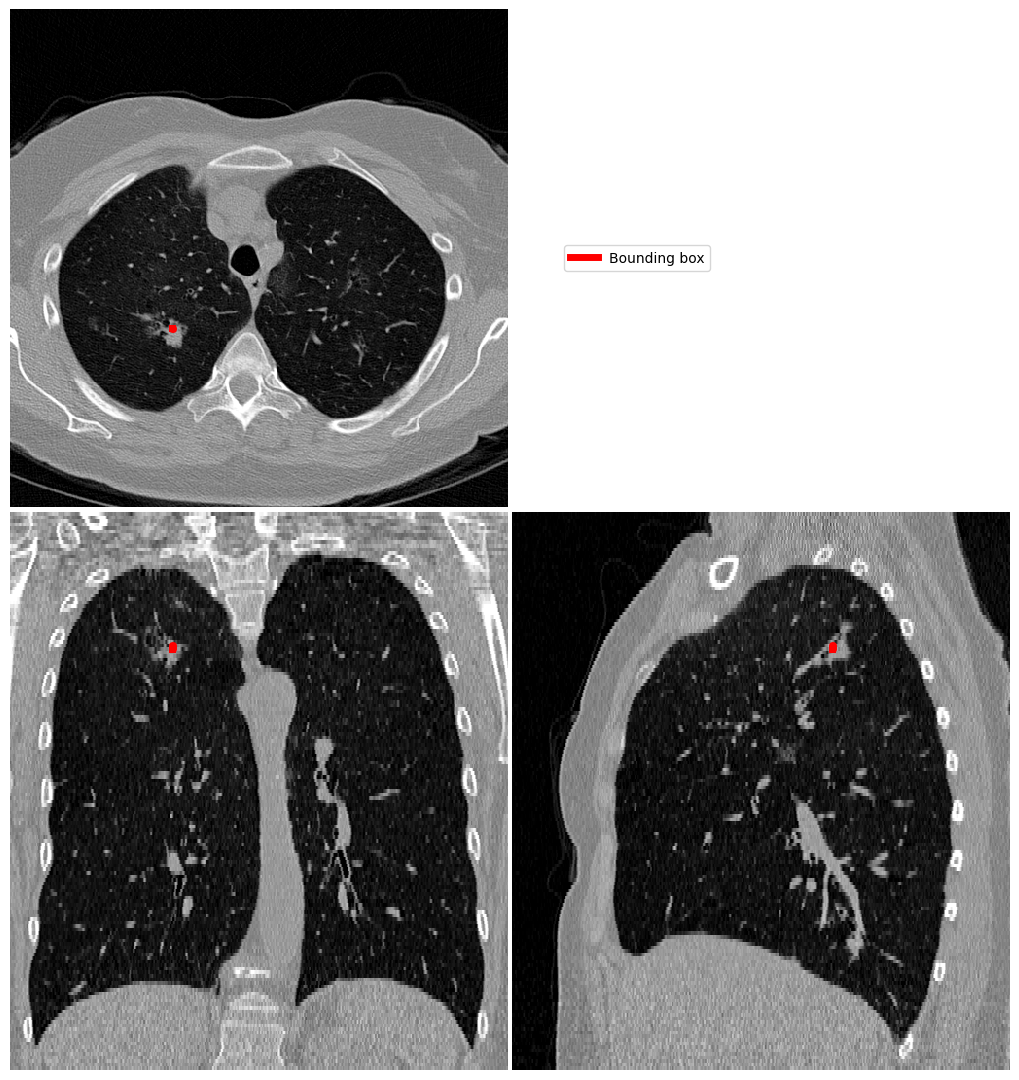

In [ ]:
row = dict(df_for_csv2.iloc[1])
visualize_seed_point(row)

In [ ]:
# Modified version of visualize_seed_point so that it will save a png

import matplotlib.pyplot as plt
import monai.transforms as monai_transforms
import numpy as np
import torch
from monai.visualize import blend_images

def visualize_seed_point_save_png(row, output_png_filename):
    """
    This function visualizes a seed point on an image.

    Args:
        row (pandas.Series): A row containing the information of the seed point, including the image path and the coordinates.
            The following columns are expected: "image_path", "coordX", "coordY", "coordZ".

    Returns:
        None
    """
    # Define the transformation pipeline
    is_label_provided = "label_path" in row
    keys = ["image_path", "label_path"] if is_label_provided else ["image_path"]
    all_keys = keys if is_label_provided else ["image_path", "coordX", "coordY", "coordZ"]

    T = monai_transforms.Compose(
        [
            monai_transforms.LoadImaged(keys=keys, image_only=True, reader="ITKReader"),
            monai_transforms.EnsureChannelFirstd(keys=keys),
            monai_transforms.Spacingd(keys=keys, pixdim=1, mode="bilinear", align_corners=True, diagonal=True),
            monai_transforms.ScaleIntensityRanged(keys=["image_path"], a_min=-1024, a_max=3072, b_min=0, b_max=1, clip=True),
            monai_transforms.Orientationd(keys=keys, axcodes="LPS"),
            monai_transforms.SelectItemsd(keys=all_keys),
        ]
    )

    # Apply the transformation pipeline
    out = T(row)

    # Calculate the center of the image
    image = out["image_path"]
    if not is_label_provided:
        center = (-out["coordX"], -out["coordY"], out["coordZ"])
        center = np.linalg.inv(np.array(out["image_path"].affine)) @ np.array(center + (1,))
        center = [int(x) for x in center[:3]]

        # Define the image and label
        label = torch.zeros_like(image)

        # Define the dimensions of the image and the patch
        C, H, W, D = image.shape
        Ph, Pw, Pd = 50, 50, 50

        # Calculate and clamp the ranges for cropping
        min_h, max_h = max(center[0] - Ph // 2, 0), min(center[0] + Ph // 2, H)
        min_w, max_w = max(center[1] - Pw // 2, 0), min(center[1] + Pw // 2, W)
        min_d, max_d = max(center[2] - Pd // 2, 0), min(center[2] + Pd // 2, D)

        # Check if coordinates are valid
        assert min_h < max_h, "Invalid coordinates: min_h >= max_h"
        assert min_w < max_w, "Invalid coordinates: min_w >= max_w"
        assert min_d < max_d, "Invalid coordinates: min_d >= max_d"

        # Define the label for the cropped region
        label[:, min_h:max_h, min_w:max_w, min_d:max_d] = 1
    else:
        label = out["label_path"]
        center = torch.nonzero(label).float().mean(dim=0)
        center = [int(x) for x in center][1:]

    # Blend the image and the label
    ret = blend_images(image=image, label=label, alpha=0.3, cmap="hsv", rescale_arrays=False)
    ret = ret.permute(3, 2, 1, 0)

    # Plot axial slice
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(ret[center[2], :, :])
    plt.title("Axial")
    plt.axis("off")

    # Plot sagittal slice
    plt.subplot(1, 3, 2)
    plt.imshow(np.flipud(ret[:, center[1], :]))
    plt.title("Coronal")
    plt.axis("off")

    # Plot coronal slice
    plt.subplot(1, 3, 3)
    plt.imshow(np.flipud(ret[:, :, center[0]]))
    plt.title("Sagittal")

    plt.axis("off")
    # plt.show()

    plt.savefig(output_png_filename)
    plt.close()

    return

In [ ]:
# Save a png for the individual seed points to make sure

num_rows = len(df_for_csv2)
print('num_rows: ' + str(num_rows))

output_png_directory = "/content/png"
if not os.path.isdir(output_png_directory):
  os.makedirs(output_png_directory, exist_ok=True)

checkpoints = {int(len(SOPInstanceUID_for_csv) * i / 10) for i in range(1, 11)}
for n in range(0,num_rows):
  row = dict(df_for_csv2.iloc[n])
  SOPInstanceUID = row['SOPInstanceUID']
  output_png_filename = os.path.join(output_png_directory, str(SOPInstanceUID) + '.png')
  visualize_seed_point_save_png(row, output_png_filename)
  if n in checkpoints:
    print(f"{(n / num_rows) * 100:.0f}% of sop processed.")

In [ ]:
%%capture

# zip the pngs and download
!zip -r /content/png.zip /content/png
from google.colab import files
files.download("/content/png.zip")

# Get the features and save to csv

In [ ]:
df_for_csv2.to_csv("/content/fmcib_input.csv")

In [ ]:
# Temporarily save to drive

!cp "/content/fmcib_input.csv" "/content/gdrive/MyDrive/Colab Notebooks/SR_NLST_Sybil/demo/"

In [ ]:
feature_df = get_features("/content/fmcib_input.csv")

2025-08-29 18:50:42.115 | INFO     | fmcib.run:get_features:12 - Loading CSV file ...
2025-08-29 18:50:42.132 | INFO     | fmcib.preprocessing:get_dataloader:35 - Building dataloader instance ...
2025-08-29 18:50:42.189 | INFO     | fmcib.models.resnet50:resnet50:14 - Loading pretrained foundation model (Resnet50) on cuda...


Downloading: 100% [738451713 / 738451713] bytes

2025-08-29 18:51:45.807 | INFO     | fmcib.run:get_features:18 - Running inference over batches ...
100%|██████████| 132/132 [13:01<00:00,  5.92s/it]


In [ ]:
# Save the dataframe so can load and train/val/test later.
feature_df.to_csv("/content/fmcib_features.csv")

In [ ]:
# Temporarily save to drive

!cp "/content/fmcib_features.csv" "/content/gdrive/MyDrive/Colab Notebooks/SR_NLST_Sybil/demo/"

In [ ]:
feature_df.head()

,Unnamed: 0,PatientID,SeriesInstanceUID,SOPInstanceUID,image_path,coordX,coordY,coordZ,label,pred_0,...,pred_4086,pred_4087,pred_4088,pred_4089,pred_4090,pred_4091,pred_4092,pred_4093,pred_4094,pred_4095
0,0,100012,1.2.840.113654.2.55.24023112856488152536348979...,1.2.840.113654.2.55.23447016361362557671014824...,/content/nifti/1.2.840.113654.2.55.24023112856...,-33.105469,-138.066406,-92.399994,0,0.951837,...,0.428301,0.887512,1.213732,0.667460,0.715536,0.394601,2.345022,1.149864,0.272130,0.351009
1,1,100012,1.2.840.113654.2.55.50761756412482430061802871...,1.2.840.113654.2.55.23050894131215950278743827...,/content/nifti/1.2.840.113654.2.55.50761756412...,-42.945312,-130.351562,1220.700012,0,1.184031,...,0.825622,1.396516,1.113015,0.801266,0.636283,0.512960,1.433738,0.916419,0.498402,0.425908
2,2,100147,1.2.840.113654.2.55.24785488463405747713776937...,1.2.840.113654.2.55.17981552983033538571417359...,/content/nifti/1.2.840.113654.2.55.24785488463...,-78.276601,37.628832,-213.690002,0,0.410163,...,1.010168,1.242570,1.235492,1.269809,1.233588,1.808234,0.588600,1.010809,1.960085,2.001158
3,3,100147,1.2.840.113654.2.55.15708941008648745210499888...,1.2.840.113654.2.55.19851369674160913596156868...,/content/nifti/1.2.840.113654.2.55.15708941008...,-70.253941,25.084302,-216.774994,0,2.209449,...,1.057473,1.166527,1.072695,1.361486,0.863343,0.572478,0.426469,1.827393,0.846412,1.422853
4,4,100158,1.2.840.113654.2.55.31060976780967844152296392...,1.2.840.113654.2.55.18324898484332559595555356...,/content/nifti/1.2.840.113654.2.55.31060976780...,-108.689825,10.937565,-149.440002,0,1.046558,...,0.241213,0.529253,2.790861,0.901257,1.260690,0.918718,2.154989,1.568339,1.264840,1.383582


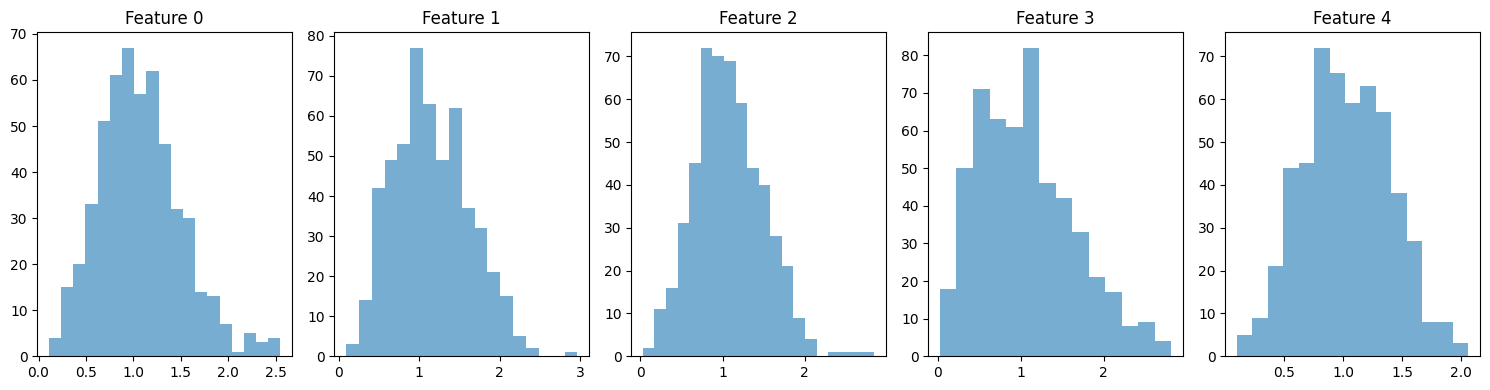

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 5, figsize=(15, 4), tight_layout=True)

for i, ax in enumerate(axs):
    ax.hist(feature_df[f"pred_{i}"], bins='auto', alpha=0.6)
    ax.set_title(f'Feature {i}')

plt.show()